## <center>Elements Of Data Science - F2020</center>
# <center>Week 12: Time Series, Data Processing, Delivery and Databases<center>
### <center>12/7/2020</center>

In [1]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_style('darkgrid')
%matplotlib inline

# TODOs

- Readings:
  - Final Review Sheet
  
<br>

- HW4, Due Friday Dec 18th 11:59pm
- Final, ??
<br>
<br>

- Answer and submit Quiz 12, **Sunday Dec 13th, 11:59pm ET**

# Today

- Finish Time Series
- Data processing and delivery
- Connecting to databases with sqlalchemy and pandas

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Timeseries in Python so far:
<br>

- `datetime .date .time .datetime .timedelta`
- format with `.strftime()`
- parse time with `pd.to_datetime()`
- `pandas Timestamp Timedelta DatetimeIndex`
- Indexing with `DatetimeIndex`
- Frequencies
- Timezones
<br>

Additional pandas functionality we won't discuss:
- `Period` and `PeriodIndex`
- `Panels`
<br>
<br>

Next: Operations on Time Series data

# Shifting

- Moving data backward or forward in time (lagging/leading)
- Ex: calculate percent change

In [2]:
ts = pd.Series([1,2,8],
               index=pd.date_range('1/1/2019',periods=3,freq='M'))
ts

2019-01-31    1
2019-02-28    2
2019-03-31    8
Freq: M, dtype: int64

In [3]:
ts.shift(1) # old value

2019-01-31    NaN
2019-02-28    1.0
2019-03-31    2.0
Freq: M, dtype: float64

# Shifting

- **percent change** : 
  - (new_value - old_value) / old_value
  - (new_value / old_value) - 1

In [4]:
#  multiply by 100 to turn into a percent
((ts / ts.shift(1)) - 1) * 100

2019-01-31      NaN
2019-02-28    100.0
2019-03-31    300.0
Freq: M, dtype: float64

# Example Dataset: Twitter Stock

In [5]:
# first run: conda install pandas-datareader
#from pandas_datareader import data
#df_twtr = data.DataReader('TWTR', start='2015', end='2021', data_source='yahoo') 
df_twtr = pd.read_csv('../data/twtr_2015-2020.csv',parse_dates=['Date'],index_col='Date')
df_twtr.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,36.740002,35.540001,36.230000,36.560001,12062500,36.560001
2015-01-05,37.110001,35.639999,36.259998,36.380001,15062700,36.380001
2015-01-06,39.450001,36.040001,36.270000,38.759998,33050800,38.759998


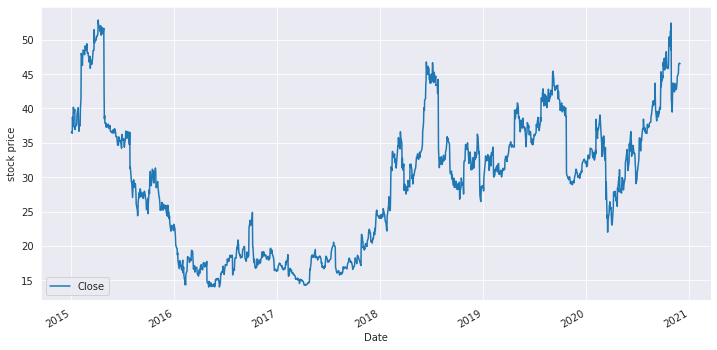

In [6]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df_twtr[['Close']].plot(ax=ax);
ax.set_ylabel('stock price');

# Example Dataset: Twitter Stock

- Calculate Percent Change of Close

In [7]:
(df_twtr.Close / df_twtr.Close.shift(1) - 1).tail(5)

Date
2020-11-23    0.005819
2020-11-24    0.006453
2020-11-25    0.026531
2020-11-27    0.003446
2020-11-30   -0.001717
Name: Close, dtype: float64

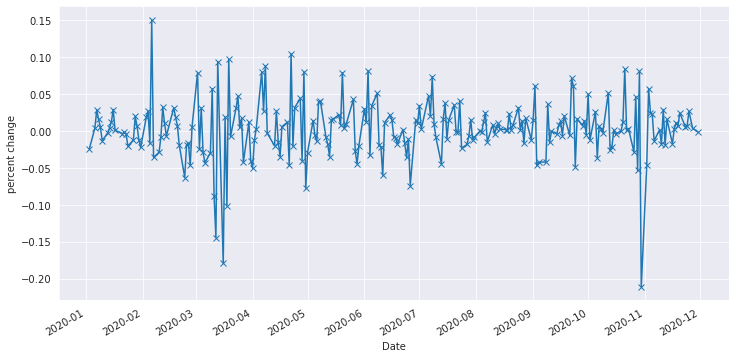

In [8]:
# plot percent change of close in 2020
fig,ax = plt.subplots(1,1,figsize=(12,6))
close_2020 = df_twtr.loc['2020','Close']
((close_2020 / close_2020.shift(1)) - 1 ).plot(marker='x',ax=ax);
ax.set_ylabel('percent change');

# Resampling

- Convert from one frequency to another
<br>

- Downsampling
  - from higher to lower (day to month)
  - need to aggregate
<br>
<br>

- Upsampling
  - from lower to higher (month to day)
  - need to fill missing
<br>
<br>

- Can also be used to set frequency from None

# Resampling: Initialize Frequency

In [9]:
df_twtr.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
               '2020-11-20', '2020-11-23', '2020-11-24', '2020-11-25',
               '2020-11-27', '2020-11-30'],
              dtype='datetime64[ns]', name='Date', length=1489, freq=None)

In [10]:
df_twtr_B = df_twtr.resample('B').asfreq() # set frequncy to business day
df_twtr_B.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-11-17', '2020-11-18', '2020-11-19', '2020-11-20',
               '2020-11-23', '2020-11-24', '2020-11-25', '2020-11-26',
               '2020-11-27', '2020-11-30'],
              dtype='datetime64[ns]', name='Date', length=1542, freq='B')

# Resampling: Downsampling

- Go from shorter to longer
- Need to aggregate (like groupby)
- Example: Downsampling from business day to business quarter
    

In [11]:
df_twtr_BQ = df_twtr.resample('BQ')
df_twtr_BQ

In [12]:
str(df_twtr_BQ)

'DatetimeIndexResampler [freq=<BusinessQuarterEnd: startingMonth=12>, axis=0, closed=right, label=right, convention=start, origin=start_day]'

In [13]:
df_twtr_BQ.mean().head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-03-31,45.080328,43.552459,44.228688,44.335574,2.084619e+07,44.335574
2015-06-30,41.634921,40.385079,41.173492,40.874603,2.232030e+07,40.874603
2015-09-30,30.638281,29.420625,30.047812,30.000625,2.031210e+07,30.000625


# Resampling: Downsampling
    

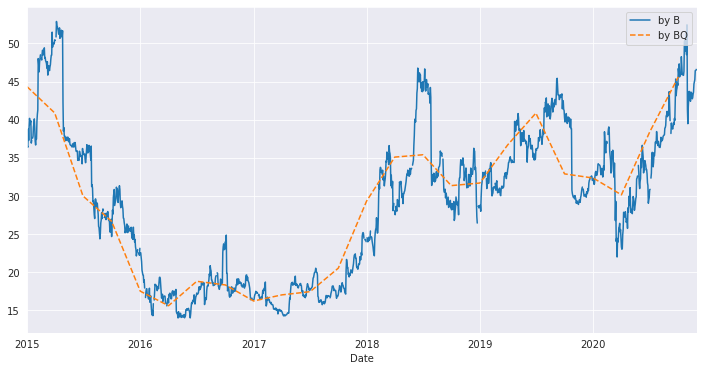

In [14]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
df_twtr_B.Close.plot(style='-', label='by B',ax=ax)
df_twtr_BQ.Close.mean().plot(style='--',label='by BQ',ax=ax)
plt.legend(loc='upper right');

# Resampling: Upsampling

- Go from longer to shorter
- Need to decide how to handle missing values
- Example: Upsample from business day to hour

In [15]:
df_twtr_B.Close.resample('H').asfreq().head(10)

Date
2015-01-02 00:00:00    36.560001
2015-01-02 01:00:00          NaN
2015-01-02 02:00:00          NaN
2015-01-02 03:00:00          NaN
2015-01-02 04:00:00          NaN
2015-01-02 05:00:00          NaN
2015-01-02 06:00:00          NaN
2015-01-02 07:00:00          NaN
2015-01-02 08:00:00          NaN
2015-01-02 09:00:00          NaN
Freq: H, Name: Close, dtype: float64

# Resampling: Upsampling

- `ffill()` : Forward Fill

In [16]:
df_twtr_B.Close.resample('H').ffill().head(3)

Date
2015-01-02 00:00:00    36.560001
2015-01-02 01:00:00    36.560001
2015-01-02 02:00:00    36.560001
Freq: H, Name: Close, dtype: float64

- `bfill()`: Backward Fill
    

In [17]:
df_twtr_B.Close.resample('H').bfill().head(3)

Date
2015-01-02 00:00:00    36.560001
2015-01-02 01:00:00    36.380001
2015-01-02 02:00:00    36.380001
Freq: H, Name: Close, dtype: float64

# Moving Windows

- Apply function on a fixed window moving accross time
- Method of smoothing out the data
- **center** : place values at center of window
   

In [18]:
df_twtr_B.Close['2020-11-02':'2020-11-06']

Date
2020-11-02    39.470001
2020-11-03    41.730000
2020-11-04    42.759998
2020-11-05    43.709999
2020-11-06    43.119999
Freq: B, Name: Close, dtype: float64

In [19]:
rolling = df_twtr_B.Close.rolling(5, center=True)
rolling

Rolling [window=5,center=True,axis=0]

In [20]:
rolling.mean()['2020-11-02':'2020-11-06']

Date
2020-11-02    43.550000
2020-11-03    41.806000
2020-11-04    42.157999
2020-11-05    42.901999
2020-11-06    43.037999
Freq: B, Name: Close, dtype: float64

# Moving Windows

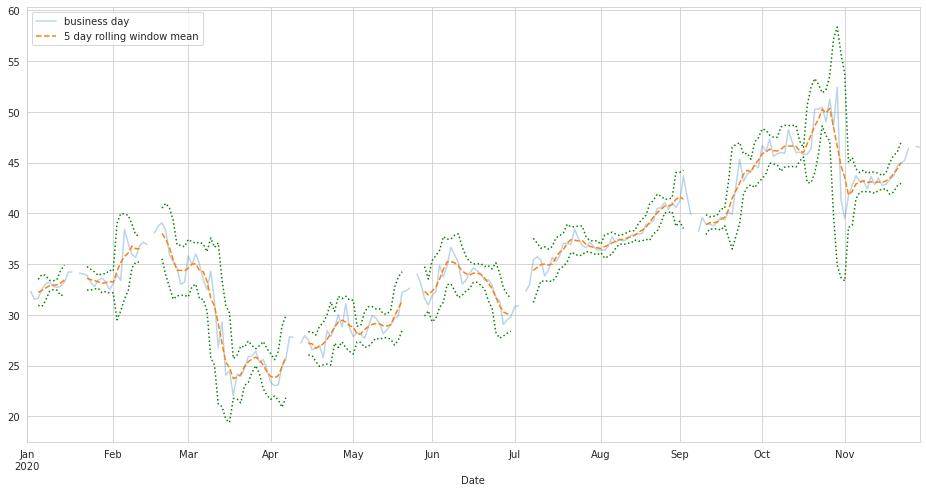

In [21]:
sns.set_style("whitegrid")
fig,ax = plt.subplots(1,1,figsize=(16,8));
df_twtr_B['2020'].Close.plot(style='-',alpha=0.3,label='business day');
rolling.mean()['2020'].plot(style='--',label='5 day rolling window mean');
(rolling.mean()['2020'] + 2*rolling.std()['2020']).plot(style=':',c='g',label='_nolegend_');
(rolling.mean()['2020'] - 2*rolling.std()['2020']).plot(style=':',c='g',label='_nolegend_');
ax.legend();

# Timeseries Operations Review

- Shifting
- Resampling 
  - Downsampling
  - Upsampling
- Moving/Rolling Windows

<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Data Processing and Delivery: ETL

- **E**xtract **T**ransform **L**oad
<br>

- Extract: Reading in data
- Transform: Transforming data
- Load: Delivering data

# Extract: Various Data Sources

- flatfiles (csv, excel)
- semi-structured documents (json, html)
- unstructured documents
- data + schema (dataframe, parquet)
- APIs (wikipedia, twitter, spotify, etc.)
- databases
<br>
<br>

- Pandas to the rescue!
+ Plus other specialized libraries

# Extracting Data with Pandas

- read_csv
- read_parquet
- read_excel
- read_table
<br>

- read_json
- read_html
<br>

- read_sql
- read_clipboard
- ...

# Extract Data: CSV

Comma Separated Values

In [22]:
%cat ../data/example.csv

Year,Make,Model,Description,Price
1997,Ford,E350,"ac, abs, moon",3000.00
1999,Chevy,"Venture Extended Edition","",4900.00
1999,Chevy,"Venture Extended Edition, Very Large",,5000.00
1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799.00


In [23]:
df = pd.read_csv('../data/example.csv',header=0,sep=',')
df

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000.0
1,1999,Chevy,Venture Extended Edition,NaN,4900.0
2,1999,Chevy,"Venture Extended Edition, Very Large",NaN,5000.0
3,1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799.0


# Extract Data: Excel
<br>

<div align="center"><img src="images/excel_example.png"></div>

In [24]:
# first run: conda install -n eods-f20 xlrd
pd.read_excel('../data/example.xlsx',sheet_name='Sheet1')

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000
1,1999,Chevy,Venture Extended Edition,NaN,4900
2,1999,Chevy,"Venture Extended Edition, Very Large",NaN,5000
3,1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799


# Extract Data: Parquet

- open source column-oriented data storage
- part of the Apache Hadoop ecosystem
- often used when working with Spark
- requires additional parsing engine eg `pyarrow`
- includes both data and **schema**
- **Schema** : metadata about the dataset (column names, datatypes, etc.)

# Extract Data: JSON

- **J**ava**S**cript **O**bject **N**otation
- often seen as return from api call
- looks like a dictionary or list of dictionaries
- pretty print using json.loads(json_string)

```
{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  "age": 27,
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    },
  ],
  "children": [],
  "spouse": null
}
```

# Extract Data: JSON


In [25]:
json = """
{"0": {"Year": 1997,
  "Make": "Ford",
  "Model": "E350",
  "Description": "ac, abs, moon",
  "Price": 3000.0},
 "1": {"Year": 1999,
  "Make": "Chevy",
  "Model": "Venture Extended Edition",
  "Description": null,
  "Price": 4900.0},
 "2": {"Year": 1999,
  "Make": "Chevy",
  "Model": "Venture Extended Edition, Very Large",
  "Description": null,
  "Price": 5000.0},
 "3": {"Year": 1996,
  "Make": "Jeep",
  "Model": "Grand Cherokee",
  "Description": "MUST SELL! air, moon roof, loaded",
  "Price": 4799.0}}
"""

In [26]:
pd.read_json(json,orient='index')

,Year,Make,Model,Description,Price
0,1997,Ford,E350,"ac, abs, moon",3000
1,1999,Chevy,Venture Extended Edition,None,4900
2,1999,Chevy,"Venture Extended Edition, Very Large",None,5000
3,1996,Jeep,Grand Cherokee,"MUST SELL! air, moon roof, loaded",4799


# Extract Data: HTML

- **H**yper**T**ext **M**arkup **L**anguage
- Parse with BeautifulSoup

In [27]:
html = """
<html>
    <head>
        <title>Example</title>
    </head>
    <body>
        <p id="first" class="example"><strong>Example text!</strong></p>
        <p id="second" class="example">And More!</p>
    </body>
</html>
"""

from bs4 import BeautifulSoup

soup = BeautifulSoup(html)
[p.text for p in soup('p')]

['Example text!', 'And More!']

# Extract Data: APIs
    
- **A**pplication **P**rogramming **I**nterface
- defines interactions between software components and resourses
- most datasources have an API
- some require authentication
- python libraries exist for most common APIs
<br>
<br>

- **requests**: library for making web requests and accessing the results

# API Example: Wikipedia

In [28]:
import requests
url = 'http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles='
title = 'Data Science'
title = title.replace(' ','%20')
print(url+title)

http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&titles=Data%20Science


In [29]:
resp = requests.get(url+title)
resp.json()

{'batchcomplete': '',
 'query': {'pages': {'49495124': {'pageid': 49495124,
    'ns': 0,
    'title': 'Data Science',
    'contentmodel': 'wikitext',
    'pagelanguage': 'en',
    'pagelanguagehtmlcode': 'en',
    'pagelanguagedir': 'ltr',
    'touched': '2020-12-01T22:30:17Z',
    'lastrevid': 706007296,
    'length': 26,
    'redirect': '',
    'new': ''}}}}

# API Example: Twitter

1. [Apply for Twitter developer account](https://projects.raspberrypi.org/en/projects/getting-started-with-the-twitter-api/2)
2. [Create a Twitter application to generate tokens and secrets](https://projects.raspberrypi.org/en/projects/getting-started-with-the-twitter-api/3)

In [30]:
with open('/home/bgibson/proj/twitter/twitter_consumer_key.txt') as f:
    consumer_key = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_consumer_secret.txt') as f:
    consumer_secret = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_access_token.txt') as f:
    access_token = f.read().strip()
with open('/home/bgibson/proj/twitter/twitter_access_token_secret.txt') as f:
    access_token_secret = f.read().strip()
 
# need to run: conda install -n eods-f20 twython
from twython import Twython
twitter = Twython(consumer_key,consumer_secret,access_token,access_token_secret)

In [31]:
public_tweets = twitter.search(q='columbia')['statuses']
for status in public_tweets[:3]:
    print('-------')
    print(status["text"])

-------
Escuchen radio columbia con @zoilarosavolio 👍🏽
-------
RT @GamecockWBB: For those asking about LeLe, she's back in Columbia recovering from a head injury. We're hoping she'll be back soon!
-------
RT @BreeNewsome: “It’s fair to ask if we need more police at this moment,” said Jeffrey Fagan, a leading expert on policing and crime at Co…


# Transforming Data

- Standardization
- Creating dummy variables
- Filling missing data
- One-Hot-Encoding
- Binning
- Parsing natural language
- Dimensionality reduction
- etc...

# Transform: Pipeline Example 1

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate some data to play with
X, y = make_classification(n_samples=500,
                           n_features=5,
                           n_informative=2, # number of informative features
                           random_state=42)
X.shape

(500, 5)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=.1)

X_train[:2].round(2)

array([[-0.18,  0.3 , -0.02, -0.3 , -0.39],
       [-0.33,  0.33, -0.01, -0.38, -0.46]])

In [34]:
pd.Series(y_train).value_counts()

1    226
0    224
dtype: int64

# Transform: Pipeline Example 1 Cont.

In [35]:
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

feature_filter = SelectKBest(f_classif, k=2)
clf = SVC(kernel='linear')
pipeline = Pipeline([('select', feature_filter), ('svc', clf)])
pipeline.set_params(svc__C=.1).fit(X_train, y_train)

Pipeline(steps=[('select', SelectKBest(k=2)),
                ('svc', SVC(C=0.1, kernel='linear'))])

In [36]:
pipeline.score(X_test,y_test)

0.88

In [37]:
np.where(pipeline['select'].get_support())[0]

array([0, 2])

# Transform: Pipeline Example 2

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

# from https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py
# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
df_titanic = pd.read_csv(titanic_url)[['age','fare','embarked','sex','pclass','survived']]

# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

In [39]:
df_titanic.head(3)

,age,fare,embarked,sex,pclass,survived
0,29.0000,211.3375,S,female,1,1
1,0.9167,151.5500,S,male,1,1
2,2.0000,151.5500,S,female,1,0


# ColumnTransformer

- Transform set of columns differently as part of a pipeline

In [40]:
from sklearn.compose import ColumnTransformer

numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # fill missing values with median
    ('scaler', StandardScaler())])                 # scale features

In [41]:
categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # fill missing value with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])                   # one hot encode

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [43]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs', random_state=42))])

# Transform: Pipeline Example 2 Cont.

In [44]:
X = df_titanic.drop('survived', axis=1)
y = df_titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
print(f"train set score: {clf.score(X_train, y_train):.3f}")
print(f"test set score : {clf.score(X_test, y_test):.3f}")

train set score: 0.784
test set score : 0.771


In [45]:
from sklearn.model_selection import GridSearchCV

# grid search deep inside the pipeline
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}

gs_pipeline = GridSearchCV(clf, param_grid, cv=3)
gs_pipeline.fit(X_train, y_train)
print("best test set score from grid search: {:.3f}".format(gs_pipeline.score(X_test, y_test)))
print("best parameter settings: {}".format(gs_pipeline.best_params_))

best test set score from grid search: 0.771
best parameter settings: {'classifier__C': 100, 'preprocessor__num__imputer__strategy': 'median'}


# Loading Data with pandas

- to_csv
- to excel
- to_json
- to_html
- to_parquet
<br>

- to_sql
- to_clipboard
<br>

- to_pickle

# Delivering Data With Flask

- Flask : lightweight web server
- can be used to create a small API to:

  - return transformed data
  - return predictions
  - return datasets
  - ...


# Aside: Running python scripts from the command line

In [46]:
!cat ../src/sample_script.py

# import necessary libraries and function
from datetime import datetime

# python as usual
# will run as script or on import
run_or_imported_at = datetime.now()
print(f"this was run or imported at {run_or_imported_at}")
print(f"{__name__ = :s}")

if __name__ == "__main__":
    # will only run if this is a script
    # won't be run if imported
    print("running as a script")


In [47]:
import sys
sys.path.append('../src/')

import sample_script

this was run or imported at 2020-12-07 12:26:06.134512
__name__ = sample_script


In [48]:
print(sample_script.run_or_imported_at)

2020-12-07 12:26:06.134512


# Aside: Function Decorators
    
- act like wrappers around functions
- decorators are prefixed by the "@" symbol
- placed above the function to be wrapped

In [49]:
def my_decorator(func):
    def wrapper():
        print("Happens before the function is called.")
        func()
        print("Happens after the function is called.")
    return wrapper

@my_decorator
def say_hello():
    print("Hello")
    
say_hello()

Happens before the function is called.
Hello
Happens after the function is called.


# Creating APIs: Flask

Need to run: `conda install -n  eods-f20 flask`

In [50]:
!cat ../src/hello_flask.py

from flask import Flask, escape, request

app = Flask(__name__)

@app.route('/')
def hello():
    name = request.args.get("name", "World")
    return f'Hello, {escape(name)}!\n'

if __name__ == '__main__':
    app.run()


1. at command line, run: `$ python hello_flask.py`

2. in ipython (or notebook)


    import requests
    r = requests.get('http://127.0.0.1:5000/?name=Bryan')
    print(r.text)

# Creating APIs: Flask with Multiple Routes

In [51]:
!cat ../src/die_flask.py

import numpy as np
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route("/")
def help():
    return "Give the number of sides the die should have.\n"

@app.route("/<int:sides>")
def roll_die(sides):
    return str(np.random.randint(1,sides+1))

@app.route("/json/<int:sides>")
def roll_die_json(sides):
    return jsonify({'sides': sides,'roll': np.random.randint(1,sides+1)})

if __name__ == '__main__':
    app.run()


# GET vs POST

- **GET** : pass information in the url
```
127.0.0.1:5000/?firstname=Bryan&lastname=Gibson
```

- **POST** : pass information as additional http request (often JSON)

```
127.0.0.1:5000/
{'firstname':'Bryan','lastname':'Gibson'}
```

# Creating APIs: Flask

- Export trained models (and other data structures) using `pickle`

In [52]:
import pickle as pkl
with open('../src/titanic_pipeline_clf.pkl','wb') as f:
    pkl.dump(gs_pipeline,f)

# Creating APIs: Deliver Predictions Using Flask

```python
from flask import Flask, escape, request, jsonify
import pickle as pkl
import pandas as pd

# need to train and pickle classifier first
with open('./titanic_clf.pkl','rb') as f:
    clf = pkl.load(f)
    
app = Flask(__name__)

@app.route('/',methods=['POST'])
def predict():
    prediction = None
    query = pd.DataFrame(request.form,index=[0])
    print(query,flush=True)
    if query is not None:
        prediction = clf.predict(query)
    if prediction:
        return jsonify([str(x) for x in prediction])
    else:
        return 'no predictions made'
    
if __name__ == '__main__':
    app.run()
```

# Creating APIs: Deliver Predictions Using Flask Cont.

In [53]:
query_label = df_titanic.iloc[0].loc['survived']

In [54]:
query = df_titanic.iloc[0,:-1].to_dict()
query

{'age': 29.0, 'fare': 211.3375, 'embarked': 'S', 'sex': 'female', 'pclass': 1}

In [55]:
query_label

1

In [56]:
# requests.post('http://127.0.0.1:5000/', data=query).text

# Data Processing Summary

- ETL
- reading datafiles using pandas
- website scraping (requests,BeautifulSoup)
- accessing data via API
- Tranforming data with Pipelines
- Exposing data via API (Flask)


<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Accessing Databases with Python

- databases vs flat-files
- Relational Databases and SQL
- NoSQL databases

# Flat Files

<div align="center"><img src="images/unnormalized.png"></div>

- csv, json, etc
<br>

- Pros
  - Ease of access
  - Simple to transport
<br>

- Cons
  - May include redundant information
  - Slow to search
  - No integity checks

# Relational Databases

- Data stored in **tables** (rows/columns)
- Table columns have well defined datatype requirements
- Complex **indexes** can be set up over often used data/searches
- Row level security, separate from the operating system
- Related data is stored in separate tables, referenced by **keys**
- Business logic in **stored procedures** and **views**
<br>

- Many commonly used Relation Databases
  - sqlite (small footprint db, might already have it installed)
  - Mysql
  - PostgreSQL
  - Microsoft SQL Server
  - Oracle

# Database Normalization

- Organize data in accordance with **normal forms**
<br>

- Rules designed to:
  - reduce data redundancy
  - improve data integrity
<br>
<br>

- Rules like:
  - Has Primary Key
  - No repeating groups
  - Cells have single values
  - No partial dependencies on keys (use whole key)
  - ...

# Database Normalization
<br>

<div align="center"><img src="images/database_normalization.jpeg"></div>

From [https://www.minigranth.com/dbms-tutorial/database-normalization-dbms/](from https://www.minigranth.com/dbms-tutorial/database-normalization-dbms/)

# De-Normalization
<br>

- But we want a single table/dataframe!
- Very often need to denormalize
- .. using joins! (see more later)

# Structured Query Language (SQL)

- (Semi) standard language for querying, transforming and returning data
- Notable characteristics:
  - generally case independent
  - white-space is ignored
  - strings denoted with single quotes
  - comments start with double-dash "--"
  
```sql
SELECT 
    client_id
    ,lastname
FROM
    company_db.bi.clients --usually database.schema.table
WHERE
    lastname LIKE 'Gi%'   --only include rows with lastname starting with Gi
LIMIT 10
```

# Small but Powerful DB: SQLite3

- likely already have it installed
- many programs use it to store configurations, history, etc
- good place to play around with sql

```
bgibson@civet:~$ sqlite3
SQLite version 3.22.0 2018-01-22 18:45:57
Enter ".help" for usage hints.
Connected to a transient in-memory database.
Use ".open FILENAME" to reopen on a persistent database.
sqlite> 
```

# Accessing Relational DBs: `sqlalchemy`

- flexible library for accessing a variety of sql dbs
- can use to query through pandas itself to retrieve a dataframe

In [57]:
import sqlalchemy

# sqlite sqlalchemy relative path syntax: 'sqlite:///[path to database file]'
engine = sqlalchemy.create_engine('sqlite:///../data/example_business.sqlite')

# read all records from the table sales
sql = """
SELECT
    *
FROM
    clients
"""

pd.read_sql(sql,engine)

,client_id,firstname,lastname,home_address_id
0,102,Mikel,Rouse,1002
1,103,Laura,Gibson,1003
2,104,None,Hurst,1003


# SQL: SELECT

In [58]:
sql="""
SELECT 
    client_id
    ,lastname
FROM
    clients
"""

pd.read_sql(sql,engine)

,client_id,lastname
0,102,Rouse
1,103,Gibson
2,104,Hurst


# SQL: AS alias

In [59]:
sql="""
SELECT 
    client_id AS cid
    ,lastname
FROM
    clients
"""

pd.read_sql(sql,engine)

,cid,lastname
0,102,Rouse
1,103,Gibson
2,104,Hurst


# SQL: * (wildcard)

In [60]:
sql="""
SELECT 
    *
FROM
    clients
"""

pd.read_sql(sql,engine)

,client_id,firstname,lastname,home_address_id
0,102,Mikel,Rouse,1002
1,103,Laura,Gibson,1003
2,104,None,Hurst,1003


# SQL: WHERE

In [61]:
sql = """
SELECT
    *
FROM
    clients
WHERE home_address_id = 1003
"""

pd.read_sql(sql,engine)

,client_id,firstname,lastname,home_address_id
0,103,Laura,Gibson,1003
1,104,None,Hurst,1003


In [62]:
sql = """
SELECT
    *
FROM
    clients
WHERE home_address_id = 1003 AND lastname LIKE 'Gi%'
"""

pd.read_sql(sql,engine)

,client_id,firstname,lastname,home_address_id
0,103,Laura,Gibson,1003


# NoSQL

- Anything that isn't traditional SQL/RDBMS
  - key-value (Redis,Berkely DB)
  - document store (MongoDB, DocumentDB)
  - wide column (Cassandra, HBase, DynamoDB)
  - graph (Neo4j)
<br>
<br>

- Rapidly growing field to fit needs
- Probably more as we speak

# Example: Mongo
<br>

- records represented as documents (think json)
- very flexible structure
- great way to store semi-structure data
- a lot of processing needed to turn into feature vectors
<br>

- contains databases (db)
  - which contain collections (like tables)
  - which you then do finds on

# Example: Mongo

- Need to have Mongo running on your local machine with a 'twitter_db' database

In [63]:
# conda install -n eods-f20 pymongo
import pymongo

# start up our client, defaults to the local machine
mdb = pymongo.MongoClient()

# get a connection to a database
db = mdb.twitter_db

# get a connection to a collection in that database
coll = db.twitter_collection

# Example: Mongo

In [65]:
# get one record
coll.find_one()

example_output = """
 '_id': ObjectId('59c95e2c2471847a9783c400'),
 'created_at': 'Mon Sep 25 19:51:08 +0000 2017',
 'id': 912404120484511749,
 'id_str': '912404120484511749',
 'text': 'RT @YarmolukDan: Waste Management Just Got Cleaner and More Efficient https://t.co/HtaXzfxbrA #DataScience #DataScientist #BigData #AI #IoT…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 912391257430794241,
  'id_str': '912391257430794241',
  'name': 'Roxane Wattenbarger',
  'screen_name': 'roxanewattenba6',
  'location': None,
  'url': None,
  'description': 'l',
  'translator_type': 'none',
  ...'
"""


<br>
<br>

# <center>Questions?</center>
<br>
<br>